In [3]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import math

hpi_red = '#b00639'
hpi_blue = '#007a9e'
hpi_yellow = '#ffde94'
hpi_orange = '#f48642'

def create_folder(filename):
    if not os.path.exists(os.path.dirname(filename)):
        try:
            os.makedirs(os.path.dirname(filename))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
                
def save_plot(filename):
    create_folder("plots/")
    plt.savefig('plots/{}.pdf'.format(filename), bbox_inches='tight', pad_inches=0)
    
    
def get_results():
    filename = "results.csv"
    return pd.read_csv(filename, header=0)

def select(data, data_type, store_type, prefetcher):
    return data[(data.data_type == data_type) & (data.store_type == store_type) & (data.prefetcher == prefetcher)]

def make_plot(store_type, prefetcher):
    data = get_results()
    fig, ax = plt.subplots()
    ax.grid()
    ax.set_xscale("log", nonposx='clip')
    store_title = store_type.replace("_", " ").title()
    if prefetcher == 1:
        prefetcher_title = "With Prefetching"
    else:
        prefetcher_title = "Without Prefetching"
    plt.title("Scan Bandwidth - {} - {}".format(store_title, prefetcher_title))
    plt.ylabel('Bandwidth (GB/s)')
    plt.xlabel('Attribute Vector Size (KB)')
    data8  = select(data, "uint8_t",  store_type, prefetcher)
    data16 = select(data, "uint16_t", store_type, prefetcher)
    data32 = select(data, "uint32_t", store_type, prefetcher)
    data64 = select(data, "uint64_t", store_type, prefetcher)
    bar4 = plt.plot(data64["column_size"] * 8 / 1000, data64["bandwidth"], "x-", color=hpi_orange, label="uint64_t")
    bar3 = plt.plot(data32["column_size"] * 4 / 1000, data32["bandwidth"], "x-", color=hpi_yellow, label="uint32_t")
    bar2 = plt.plot(data16["column_size"] * 2 / 1000, data16["bandwidth"], "x-", color=hpi_blue, label="uint16_t")
    bar1 = plt.plot(data8["column_size"] * 1 / 1000,  data8["bandwidth"], "x-", color=hpi_red, label="uint8_t")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    save_plot("scan_bandwidth" + store_type)
    plt.show()

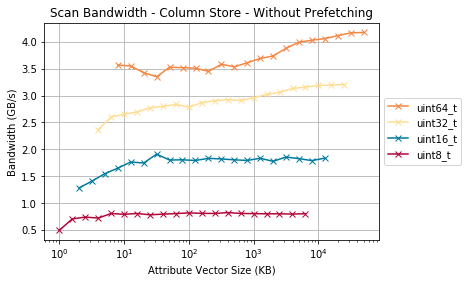

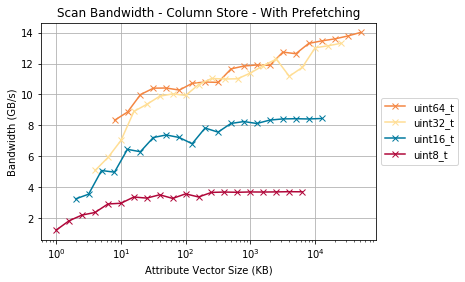

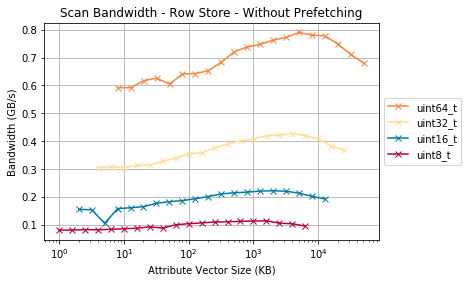

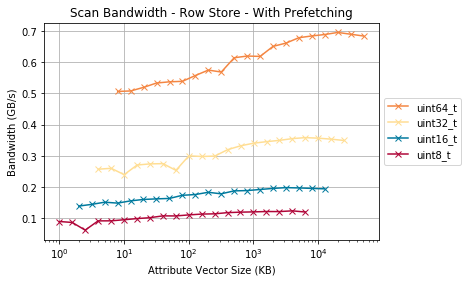

In [4]:
make_plot("column_store", 0)
make_plot("column_store", 1)
make_plot("row_store", 0)
make_plot("row_store", 1)